## Assignment 4

### Qian Zhang

In [1]:
# import packages

import numpy as np
import time
import scipy.optimize as opt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## exer 2.1

In [2]:
# load the setting in Section 2.6

A = 1 
alpha = 0.35 
beta = 0.96**20
delta = 1-(1-0.05)**20
sigma = 3 
nvec = np.array([1.0, 1.0, 0.2])
f_params = (nvec, A, alpha, delta)

In [3]:
# define the feasible function

def feasible(f_params, bvec_guess):
    
        nvec, A, alpha, delta = f_params
        b2, b3 = bvec_guess
        
        K = np.sum(bvec_guess)
        L = np.sum(nvec)
        w = A * (1 - alpha) * ((K / L) ** alpha)
        r = A * alpha * ((L / K) ** (1 - alpha)) - delta
        
        c1 = nvec[0] * w - b2
        c2 = nvec[1] * w + (1 + r) * b2 - b3
        c3 = nvec[2] * w + (1 + r) * b3
        
        K_cnstr, c_cnstr, b_cnstr = np.full(1, False), np.full(3, False), np.full(2, False)

        K_cnstr[0] = K <= 0
        c_cnstr = [(c1 <= 0), (c2 <= 0), (c3 <= 0)]

        if c_cnstr[0] == True:
            b_cnstr[0] = True
        if c_cnstr[1] == True:
            b_cnstr[0], b_cnstr[1] = True, True
        if c_cnstr[2] == True:
            b_cnstr[1] = True
                
        return b_cnstr, c_cnstr, K_cnstr

### exer 2.1 (a)

In [4]:
bvec_guess = np.array([1.0, 1.2])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print('b_cnstr is {}.\nc_cnstr is {}.\nK_cnstr is {}.'.format(b_cnstr, c_cnstr, K_cnstr))

b_cnstr is [ True False].
c_cnstr is [True, False, False].
K_cnstr is [False].


It shows that the consumption nonnegativity constraint at period 1 is violated by the given initial guess.

### exer 2.1 (b)

In [5]:
bvec_guess = np.array([0.06, -0.001])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print('b_cnstr is {}.\nc_cnstr is {}.\nK_cnstr is {}.'.format(b_cnstr, c_cnstr, K_cnstr))

b_cnstr is [False False].
c_cnstr is [False, False, False].
K_cnstr is [False].


It shows that no constraints are violated by the given initial guess.

### exer 2.1 (c)

In [6]:
bvec_guess = np.array([0.1, 0.1])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print('b_cnstr is {}.\nc_cnstr is {}.\nK_cnstr is {}.'.format(b_cnstr, c_cnstr, K_cnstr))

b_cnstr is [False False].
c_cnstr is [False, False, False].
K_cnstr is [False].


It shows that no constraints are violated by the given initial guess.

## exer 2.2

In [7]:
def EulEq(bvec, args):
    
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = args
    
    b2, b3 = bvec
    
    K = np.sum(bvec)
    L = np.sum(nvec)
    w = A * (1 - alpha) * ((K / L) ** alpha)
    r = A * alpha * ((L / K) ** (1 - alpha)) - delta

    c1 = nvec[0] * w - b2
    c2 = nvec[1] * w + (1 + r) * b2 - b3
    c3 = nvec[2] * w + (1 + r) * b3
    
    c = [c1, c2, c3]
    
    EE1 = (c[0] ** (-sigma)) - beta * (1 + r) * (c[1] ** (-sigma)) 
    EE2 = (c[1] ** (-sigma)) - beta * (1 + r) * (c[2] ** (-sigma))
    
    EulErr_ss = np.array([EE1, EE2])
    
    return EulErr_ss

# define the get_SS function

def get_SS(params, bvec_guess, SS_graphs):
    
    start_time = time.clock() # Place at beginning of get_SS()
    
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    
    b_ss = opt.root(EulEq, bvec_guess, args = np.array(params)).x
    K_ss = np.sum(b_ss)
    w_ss = A * (1 - alpha) * ((K_ss / L) ** alpha)
    r_ss = A * alpha * ((L / K_ss) ** (1 - alpha)) - delta
    Y_ss = A * (K_ss ** alpha) * (L ** (1 - alpha))
    b2, b3 = b_ss
    
    c1 = nvec[0] * w_ss - b2
    c2 = nvec[1] * w_ss + (1 + r_ss) * b2 - b3
    c3 = nvec[2] * w_ss + (1 + r_ss) * b3
    
    c_ss = np.array([c1, c2, c3])
    C_ss = np.sum(c_ss)
    
    EE1 = (c_ss[0] ** (-sigma)) - beta * (1 + r_ss) * (c_ss[1] ** (-sigma)) 
    EE2 = (c_ss[1] ** (-sigma)) - beta * (1 + r_ss) * (c_ss[2] ** (-sigma))
    
    EulErr_ss = np.array([EE1, EE2])
    
    RCerr_ss = Y_ss - C_ss - delta * K_ss

    ss_time = time.clock() - start_time # Place at end of get_SS()

    ss_output = {'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
                 'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
                 'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
                 'ss_time': ss_time}
    
    if SS_graphs:
        t1 = np.array([1,2,3])
        t2 = np.array([2,3])
        plt.plot(t1, c_ss, marker='o',label='consumptions')
        plt.plot(t2, b_ss, marker='o',label='savings')
        plt.xlabel('Agent\'s age')
        plt.ylabel('Agent\'s comsumption, savings')
        plt.title('Steady-state Distribution of Consumptions and Savings by Age')
        plt.legend()
        plt.show()
    
    return ss_output

### exer 2.2 (a)

In [8]:
SS_tol = 1e-9
bvec_guess = np.array([0.1, 0.1])

params = (beta, sigma, nvec, np.sum(nvec), A, alpha, delta, SS_tol)
ss_output = get_SS(params, bvec_guess, False)
print("Steady-state equilibrium values for each parameter:")
ss_output

Steady-state equilibrium values for each parameter:


{'b_ss': array([0.01931274, 0.05841159]),
 'c_ss': array([0.18241256, 0.20961491, 0.24087382]),
 'w_ss': 0.2017252935955733,
 'r_ss': 2.4330302535646116,
 'K_ss': 0.07772432611811347,
 'Y_ss': 0.6827625321696328,
 'C_ss': 0.6329012827935535,
 'EulErr_ss': array([-1.33582034e-12,  2.67164069e-12]),
 'RCerr_ss': 3.469446951953614e-17,
 'ss_time': 0.00046999999999997044}

In [9]:
print ('The steady-state equilibrium is computed for {} seconds.'.format(ss_output['ss_time']))

The steady-state equilibrium is computed for 0.00046999999999997044 seconds.


### exer 2.2 (b)

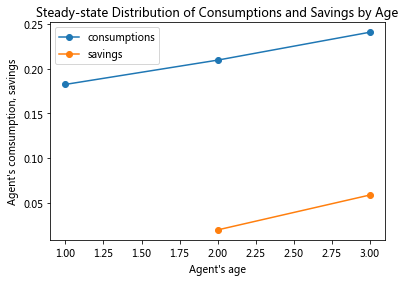

{'b_ss': array([0.01931274, 0.05841159]),
 'c_ss': array([0.18241256, 0.20961491, 0.24087382]),
 'w_ss': 0.2017252935955733,
 'r_ss': 2.4330302535646116,
 'K_ss': 0.07772432611811347,
 'Y_ss': 0.6827625321696328,
 'C_ss': 0.6329012827935535,
 'EulErr_ss': array([-1.33582034e-12,  2.67164069e-12]),
 'RCerr_ss': 3.469446951953614e-17,
 'ss_time': 0.00048599999999998644}

In [10]:
# set SS_graphs=True

get_SS(params, bvec_guess, True)

### exer 2.2 (c)

In [11]:
params2 = (0.55, sigma, nvec, np.sum(nvec), A, alpha, delta, SS_tol)
ss_output2 = get_SS(params2, bvec_guess, False)
print("Steady-state equilibrium values for each parameter (when beta is 0.55):")
ss_output2

Steady-state equilibrium values for each parameter (when beta is 0.55):


{'b_ss': array([0.02817696, 0.07686557]),
 'c_ss': array([0.19597535, 0.22861559, 0.26669216]),
 'w_ss': 0.22415231191003757,
 'r_ss': 1.8863599991451423,
 'K_ss': 0.1050425255076521,
 'Y_ss': 0.7586693633878195,
 'C_ss': 0.691283104528901,
 'EulErr_ss': array([6.93489710e-12, 2.54374299e-12]),
 'RCerr_ss': -5.551115123125783e-17,
 'ss_time': 0.00043199999999998795}

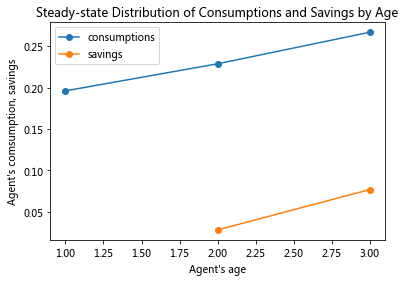

{'b_ss': array([0.02817696, 0.07686557]),
 'c_ss': array([0.19597535, 0.22861559, 0.26669216]),
 'w_ss': 0.22415231191003757,
 'r_ss': 1.8863599991451423,
 'K_ss': 0.1050425255076521,
 'Y_ss': 0.7586693633878195,
 'C_ss': 0.691283104528901,
 'EulErr_ss': array([6.93489710e-12, 2.54374299e-12]),
 'RCerr_ss': -5.551115123125783e-17,
 'ss_time': 0.0003830000000000222}

In [12]:
# set SS_graphs=True
# check the figure 

get_SS(params2, bvec_guess, True)

When $\beta$ is larger, the steady-state value of wage, consumptions (in every period) and savings (in every period) all increase, while the steady-state value of interest rate decreases. The intuition behind may be that higher $\beta$ will lead the comsumers to focus more on the later periods than the present one, which will result in more savings. Higher savings will increase firm capitals and it will then cause higher wages and lower interest rates. This will lead to more consumption. 

## exer 2.3

In [13]:
# to avoid redundance formula calc in the following funcs, set these lambda funcs to get value quickly

get_r = lambda K, L, alpha, delta, A : A * alpha * ((L / K) ** (1 - alpha)) - delta
get_w = lambda K, L, alpha, A: A * (1 - alpha) * ((K / L) ** alpha)
get_K = lambda b2, b3: b2+b3
get_util = lambda c, sigma=3: (c ** (1-sigma))/(1-sigma)
get_MU = lambda c, sigma=3: c ** (-sigma)
get_Y = lambda K, L, alpha, A: A * (K ** alpha) * (L ** (1-alpha))
get_cons = lambda b_s, b_s_1, n_s, r, w: w * n_s + (1 + r) * b_s - b_s_1

In [14]:
# define some sub funcs

def get_b32(b32, *args):
        r2, r3, b21, w2, w3, beta, sigma, nvec = args
        c2  = get_cons(b21, b32, nvec[1], r2, w2)
        c3  = get_cons(b32, 0, nvec[2], r3, w3)
        MU2 = get_MU(c2)
        MU3 = get_MU(c3)
        error =  MU2 - beta * (1 + r3) * MU3
        return error
    
def path_solver(path, *args):
    bvec_init_val, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init_val

    b32_init = 0.1
    b32_args  = (path[0 , 3], path[1 , 3], b_mat[0 , 0], path[0 , 2], path[1 , 2], beta, sigma, nvec)
    b32 = opt.root(get_b32, b32_init, args = (b32_args))
    b32 = b32.x
    b_mat[1 , 1] = b32
    for i in range(path.shape[0]-2):
        w1 = path[i - 1 , 2]
        w2 = path[i , 2]
        w3 = path[i + 1 , 2]
        r2 = path[i , 3]
        r3 = path[i + 1, 3]
        ts_args = (w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec)
        bvec_ts = opt.root(EulErr, bvec_init, args = (ts_args))
        b_mat[i , 0] = bvec_ts.x[0]
        b_mat[i + 1, 1] = bvec_ts.x[1]
    b_mat[: , 2] = b_mat[: , 0] + b_mat[: , 1]
    return b_mat

def path_time(K_path_update, K_init, K_ss, T, A, alpha, delta, nvec, m, Type):
    path = np.zeros([T + m, 4])
    period_path  = np.arange(1, T + m +1)
    if Type == "linear":
        K_path = np.linspace(K_init, K_ss, num = T)
    if Type == "update":
        K_path = K_path_update
    path[: , 0] = period_path
    path[: -m, 1] = K_path
    path[-m: , 1] = K_ss
    path[: , 2] = get_w(path[: , 1], nvec.sum(), alpha, A)
    path[: , 3] = get_r(path[: , 1], nvec.sum(), alpha, delta, A)
    return path

def EulErr(bvec, *args):
    w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec = args
    b2, b3 = bvec
    L = nvec.sum()
    K = get_K(b2, b3)
    c1 = get_cons(0, b2, nvec[0], r2, w1)
    c2 = get_cons(b2, b3, nvec[1], r2, w2)
    c3 = get_cons(b3, 0, nvec[2], r3, w3)
    MU1 = get_MU(c1)
    MU2 = get_MU(c2)
    MU3 = get_MU(c3)
    Eul1 = MU1 - beta*(1+r2) * MU2
    Eul2 = MU2 - beta*(1+r3) * MU3
    Euler_errs = np.array([Eul1, Eul2])
    return Euler_errs

In [15]:
# define the TPI function

def TPI(path_init, xival, tol, *args):
    bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init
    b_HH_init  = path_solver(path_init, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
    dist_init = 1e9
    if dist_init > tol:
        path = path_init
        b_HH = b_HH_init
        dist = dist_init
        iter_num = 0
        while dist > tol:
            update = xival * b_HH[: -m, 2] + (1 - xival) * path[: -m, 1]
            path = path_time(update, 0, K_ss, T, A, alpha, delta, nvec, m, "update")
            b_HH = path_solver(path, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
            dist = sum(((path[: -m, 1] - b_HH[: -m, 2])/path[: -m, 1])**2)
            iter_num = iter_num + 1
            print("iteration: ", iter_num, " the distance is : ", dist)

        result = (path, b_HH)
    else:
        result =  (path_init, b_HH_init)
    return result

### exer 2.3 (a)

In [16]:
# give the basic setting

xival = 0.1
tol = 1e-9
ss_output = get_SS(params, bvec_guess, False)
bvec_init = np.array([0.8 * ss_output['b_ss'][0], 1.1 * ss_output['b_ss'][1]])
T = 40
m = 10
bvec_ss = ss_output['b_ss']
K_ss = ss_output['K_ss']
K_init = bvec_init.sum()

path_init = path_time(0, K_init, K_ss, T, A, alpha, delta, nvec, m, "linear")

In [17]:
path = TPI(path_init, xival, tol,  bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss)

iteration:  1  the distance is :  0.003553673825579648
iteration:  2  the distance is :  0.0029244814562935087
iteration:  3  the distance is :  0.0024238221362930853
iteration:  4  the distance is :  0.0020226062403272092
iteration:  5  the distance is :  0.0016987638250673836
iteration:  6  the distance is :  0.0014354810206846785
iteration:  7  the distance is :  0.001219892700043312
iteration:  8  the distance is :  0.001042110191682677
iteration:  9  the distance is :  0.0008944959575708422
iteration:  10  the distance is :  0.0007711209310175705
iteration:  11  the distance is :  0.0006673573674739435
iteration:  12  the distance is :  0.0005795725132289232
iteration:  13  the distance is :  0.0005048974755538979
iteration:  14  the distance is :  0.00044105232658166947
iteration:  15  the distance is :  0.00038621335851108263
iteration:  16  the distance is :  0.0003389120095644348
iteration:  17  the distance is :  0.0002979576429920738
iteration:  18  the distance is :  0.0002

In [18]:
# calc the errors

K_path = path[0][:, [0 , 1]]
w_path = path[0][:, [0 , 2]]
r_path = path[0][:, [0 , 3]]
b_path = path[1][:,:2]

Eulerr_path = np.zeros((30, 2))
RCerr_path = np.zeros(30)
for i in range(30):
    if i == 0:
        rt = rt1 = r_path[0,1]
        wt = wt1 = w_path[0,1]
        b2t = b2t1 = b_path[0, 0]
        b3t = b3t1 = b_path[0, 1]
    else:
        rt, rt1 = r_path[i, 1], r_path[i-1, 1]
        b2t, b3t = b_path[i,:]
        b2t1, b3t1 = b_path[i-1, :]
        wt, wt1 = w_path[i,1], w_path[i-1, 1]
    Kt = K_path[i,1]
    Kt_1 = K_path[i+1, 1]
    Yt = get_Y(Kt, nvec.sum(), alpha, A)
    c1t = get_cons(0, b2t, nvec[0], rt, wt)
    c2t = get_cons(b2t1, b3t, nvec[1], rt1, wt)
    c3t = get_cons(b3t1, 0, nvec[2], rt1, wt)
    Ct = c1t + c2t + c3t
    RCerr_path[i] = Yt - Ct - Kt_1 + (1 - delta) * Kt
    Eulerr_path[i, :] = EulErr(b_path[i, :], w_path[i,1], w_path[i+1,1], 
                               w_path[i+2,1], r_path[i+1,1], r_path[i+2,1], 
                               beta, alpha, delta, sigma, A, nvec)

In [19]:
print('Maximum of the absolute values of all the Euler errors across the entire time path is {}.'.format(np.abs(Eulerr_path).max()))
print('Maximum of the absolute values of all the resource constraint errors across the entire time path is {}.'.format(np.abs(RCerr_path).max()))

Maximum of the absolute values of all the Euler errors across the entire time path is 37.40385544984869.
Maximum of the absolute values of all the resource constraint errors across the entire time path is 0.0057733905786395805.


### exer 2.3 (b)

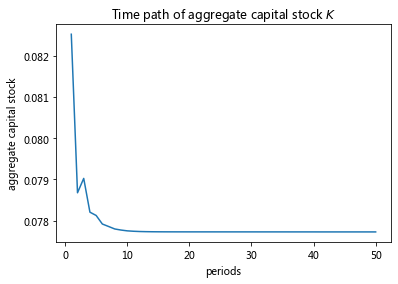

In [20]:
# plot K

K_fig = plt.figure()
plt.plot(K_path[: , 0], K_path[: , 1])
plt.xlabel('periods')
plt.ylabel('aggregate capital stock')
plt.title('Time path of aggregate capital stock $K$')
plt.show()

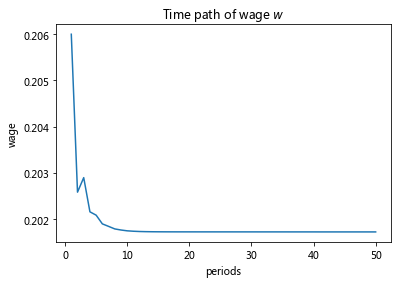

In [21]:
# plot wage

w_fig = plt.figure()
plt.plot(w_path[: , 0], w_path[: , 1])
plt.xlabel('periods')
plt.ylabel('wage')
plt.title('Time path of wage $w$')
plt.show()

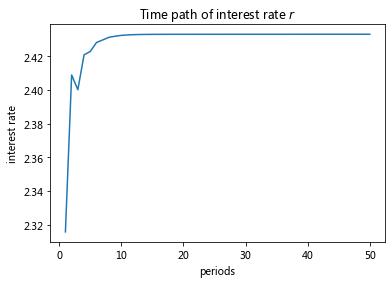

In [22]:
# plot interest rate

r_fig = plt.figure()
plt.plot(r_path[: , 0], r_path[: , 1])
plt.xlabel('periods')
plt.ylabel('interest rate')
plt.title('Time path of interest rate $r$')
plt.show()

### exer 2.3 (c)

In [23]:
for i in range(50):
    K = K_path[i, 1]
    if abs(K - K_ss) <= 0.00001:
        print('To get within 0.00001 of the steady-state aggregate capital stock K, it takes {} period.'.format(int(K_path[i, 0])))
        break

To get within 0.00001 of the steady-state aggregate capital stock K, it takes 12 period.


In [24]:
for i in range(50):
    K_mat = K_path[i:, 1]
    Diff = np.abs(K_mat - K_ss)
    if np.sum(Diff > 0.00001) == 0:
        print("Period {} is the period after which the aggregate capital stock never is again farther than 0.00001 away from the steady-state.".format(int(K_path[i, 0])))
        break

Period 12 is the period after which the aggregate capital stock never is again farther than 0.00001 away from the steady-state.
